In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from scipy.stats.mstats import winsorize
from sqlalchemy import create_engine
import warnings
warnings.filterwarnings('ignore')

In [3]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'studentsperformance'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

student = pd.read_sql_query('select * from studentsperformance',con=engine)

engine.dispose()

In [4]:
student.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
student.isnull().sum()*100/student.isnull().count()

gender                         0.0
race/ethnicity                 0.0
parental level of education    0.0
lunch                          0.0
test preparation course        0.0
math score                     0.0
reading score                  0.0
writing score                  0.0
dtype: float64

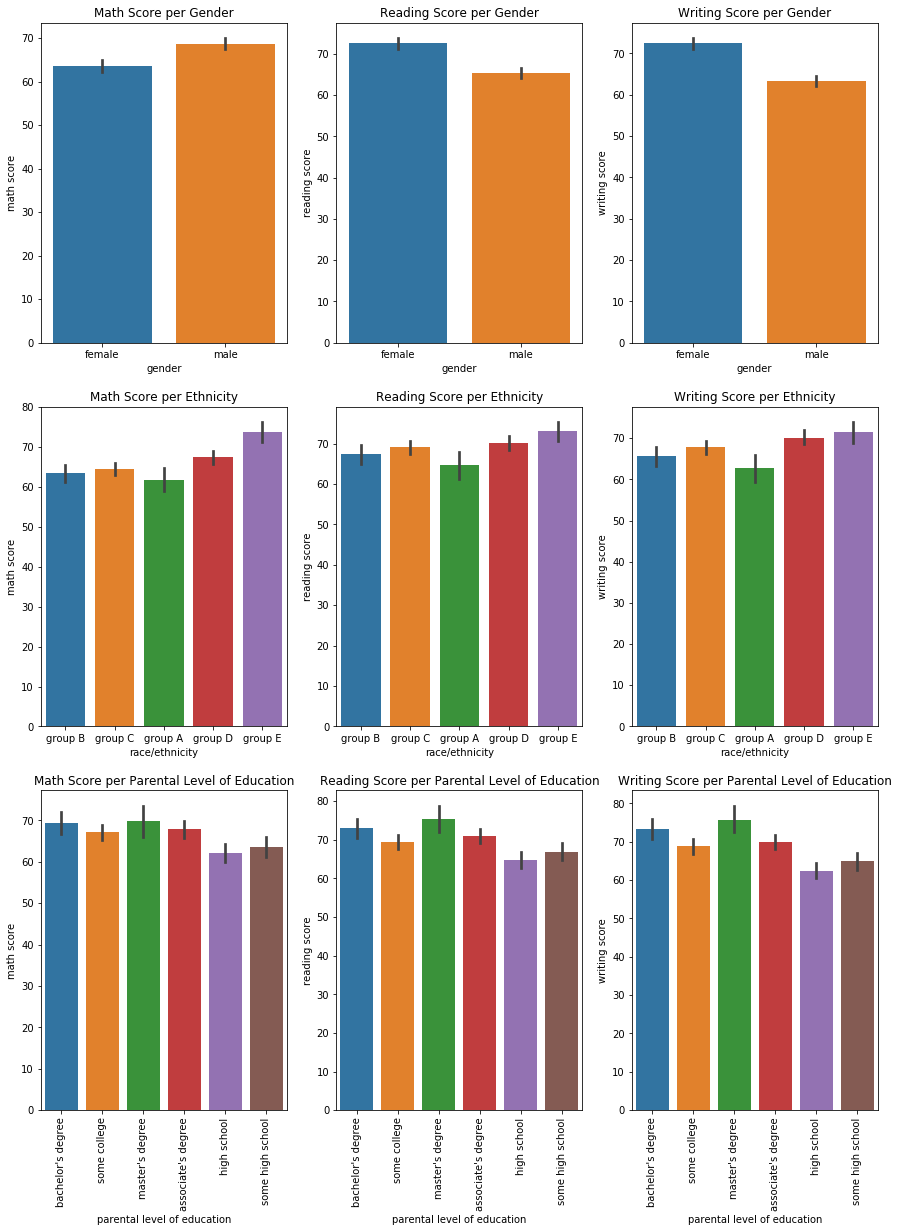

In [23]:
plt.figure(figsize=(15,20))

plt.subplot(3,3,1)
sns.barplot(student["gender"], student["math score"])
plt.title("Math Score per Gender")

plt.subplot(3,3,2)
sns.barplot(student["gender"], student["reading score"])
plt.title("Reading Score per Gender")

plt.subplot(3,3,3)
sns.barplot(student["gender"], student["writing score"])
plt.title("Writing Score per Gender")

plt.subplot(3,3,4)
sns.barplot(student["race/ethnicity"], student["math score"])
plt.title("Math Score per Ethnicity")

plt.subplot(3,3,5)
sns.barplot(student["race/ethnicity"], student["reading score"])
plt.title("Reading Score per Ethnicity")

plt.subplot(3,3,6)
sns.barplot(student["race/ethnicity"], student["writing score"])
plt.title("Writing Score per Ethnicity")

plt.subplot(3,3,7)
sns.barplot(student["parental level of education"], student["math score"])
plt.title("Math Score per Parental Level of Education")
plt.xticks(rotation = 'vertical')

plt.subplot(3,3,8)
sns.barplot(student["parental level of education"], student["reading score"])
plt.title("Reading Score per Parental Level of Education")
plt.xticks(rotation = 'vertical')

plt.subplot(3,3,9)
sns.barplot(student["parental level of education"], student["writing score"])
plt.title("Writing Score per Parental Level of Education")
plt.xticks(rotation = 'vertical')

plt.show()

In [20]:
gender = student["gender"].unique()
for var in ["math score", "reading score", "writing score"]:
    print("------------------------------------------------")
    print("Comparisons for variable: {}".format(var))
    print("------------------------------------------------")
    print("t-test between groups {0} and {1}:".format(gender[0], gender[1]))
    print(stats.ttest_ind(
         student[student["gender"]==gender[0]][var], 
         student[student["gender"]==gender[1]][var]
            ))

------------------------------------------------
Comparisons for variable: math score
------------------------------------------------
t-test between groups female and male:
Ttest_indResult(statistic=-5.383245869828983, pvalue=9.120185549328822e-08)
------------------------------------------------
Comparisons for variable: reading score
------------------------------------------------
t-test between groups female and male:
Ttest_indResult(statistic=7.959308005187657, pvalue=4.680538743933289e-15)
------------------------------------------------
Comparisons for variable: writing score
------------------------------------------------
t-test between groups female and male:
Ttest_indResult(statistic=9.979557910004507, pvalue=2.019877706867934e-22)


There was a significant difference in score between females and males. Femles socred higher in reading and writing subjects, while they scored lower than males in math subject.

In [21]:
ethnicity = student["race/ethnicity"].unique()
for var in ["math score", "reading score", "writing score"]:
    print("------------------------------------------------")
    print("Comparisons for variable: {}".format(var))
    print("------------------------------------------------")
    for i in range(0, len(ethnicity)):
        for j in range(i+1, len(ethnicity)):
            print("t-test between groups {0} and {1}:".format(ethnicity[i], ethnicity[j]))
            print(stats.ttest_ind(
                student[student["race/ethnicity"]==ethnicity[i]][var], 
                student[student["race/ethnicity"]==ethnicity[j]][var]
            ))

------------------------------------------------
Comparisons for variable: math score
------------------------------------------------
t-test between groups group B and group C:
Ttest_indResult(statistic=-0.7315669893534263, pvalue=0.4647708939167453)
t-test between groups group B and group A:
Ttest_indResult(statistic=0.9355076279747488, pvalue=0.3503415961659957)
t-test between groups group B and group D:
Ttest_indResult(statistic=-2.82845539712675, pvalue=0.004886197137104194)
t-test between groups group B and group E:
Ttest_indResult(statistic=-6.007397050552227, pvalue=5.007946047497971e-09)
t-test between groups group C and group A:
Ttest_indResult(statistic=1.5997220303217299, pvalue=0.11043810745588042)
t-test between groups group C and group D:
Ttest_indResult(statistic=-2.41858624746011, pvalue=0.015888349556016285)
t-test between groups group C and group E:
Ttest_indResult(statistic=-6.127642520822135, pvalue=1.927238849552764e-09)
t-test between groups group A and group D:


In general ethnicity "E" students are scoring higher than all other students in all subjects. There is no significant differnce between them and ethnicity "D" students in writting subject only. Students with ethnicity "D" landed second. the difference is more obvious in math. Ethnicities "A" , "B" , "C" scores lower than "D" and "E" and there is no difference in terms of scores between these relatively lower score groups, with exception of higher score in reading and writing for ethnicity "C" students compare to ethnicity "A" students.

In [24]:
parnetal_edu = student["parental level of education"].unique()
for var in ["math score", "reading score", "writing score"]:
    print("------------------------------------------------")
    print("Comparisons for variable: {}".format(var))
    print("------------------------------------------------")
    for i in range(0, len(parnetal_edu)):
        for j in range(i+1, len(parnetal_edu)):
            print("t-test between groups {0} and {1}:".format(parnetal_edu[i], parnetal_edu[j]))
            print(stats.ttest_ind(
                student[student["parental level of education"]==parnetal_edu[i]][var], 
                student[student["parental level of education"]==parnetal_edu[j]][var]
            ))

------------------------------------------------
Comparisons for variable: math score
------------------------------------------------
t-test between groups bachelor's degree and some college:
Ttest_indResult(statistic=1.3702352829617477, pvalue=0.17151224218471559)
t-test between groups bachelor's degree and master's degree:
Ttest_indResult(statistic=-0.14868196568849312, pvalue=0.8819757824867702)
t-test between groups bachelor's degree and associate's degree:
Ttest_indResult(statistic=0.8786641889793243, pvalue=0.38020757818036177)
t-test between groups bachelor's degree and high school:
Ttest_indResult(statistic=4.236143622484822, pvalue=2.9965345853843376e-05)
t-test between groups bachelor's degree and some high school:
Ttest_indResult(statistic=3.196718602676573, pvalue=0.0015409192922812146)
t-test between groups some college and master's degree:
Ttest_indResult(statistic=-1.2356334215824571, pvalue=0.21761956810347416)
t-test between groups some college and associate's degree:

Parental level of education has its effect in students performance. As the level of parents education is higher as the scores of the students higher. students with masters degree parents score higher than other students espicailly in writting and reading. In math, the level of education is not making a difference as parents have a level of education higher than high school.

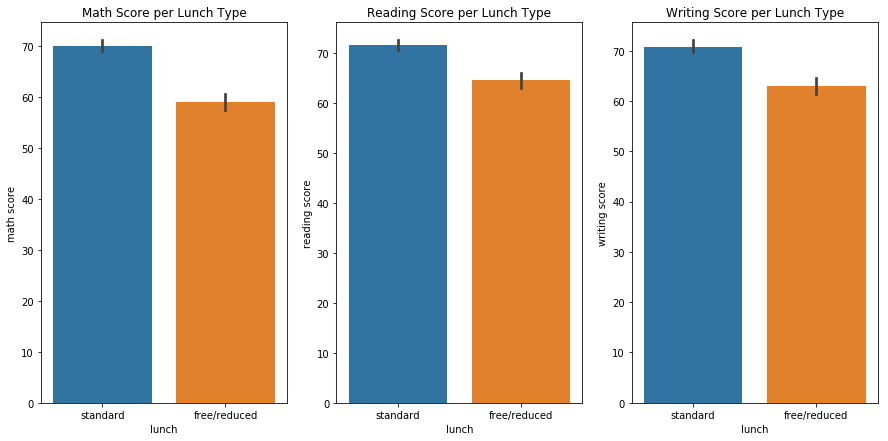

In [30]:
plt.figure(figsize=(15,7))

plt.subplot(1,3,1)
sns.barplot(student["lunch"], student["math score"])
plt.title("Math Score per Lunch Type")

plt.subplot(1,3,2)
sns.barplot(student["lunch"], student["reading score"])
plt.title("Reading Score per Lunch Type")

plt.subplot(1,3,3)
sns.barplot(student["lunch"], student["writing score"])
plt.title("Writing Score per Lunch Type")

plt.show()

In [27]:
lunch = student["lunch"].unique()
for var in ["math score", "reading score", "writing score"]:
    print("------------------------------------------------")
    print("Comparisons for variable: {}".format(var))
    print("------------------------------------------------")
    print("t-test between groups {0} and {1}:".format(lunch[0], lunch[1]))
    print(stats.ttest_ind(
          student[student["lunch"]==lunch[0]][var], 
          student[student["lunch"]==lunch[1]][var]
        ))

------------------------------------------------
Comparisons for variable: math score
------------------------------------------------
t-test between groups standard and free/reduced:
Ttest_indResult(statistic=11.837180472914612, pvalue=2.4131955993137074e-30)
------------------------------------------------
Comparisons for variable: reading score
------------------------------------------------
t-test between groups standard and free/reduced:
Ttest_indResult(statistic=7.451056467473455, pvalue=2.0027966545279011e-13)
------------------------------------------------
Comparisons for variable: writing score
------------------------------------------------
t-test between groups standard and free/reduced:
Ttest_indResult(statistic=8.009784197834758, pvalue=3.186189583166477e-15)


students who take free/reduced meals receive scores significantly lower than students who take standard luch meals. This could be due to a correlation between the lunch type and the level of education. in general parents with higher education have higher income than parents with lower degrees and this might be the cause and not the meal students eat for lunch.

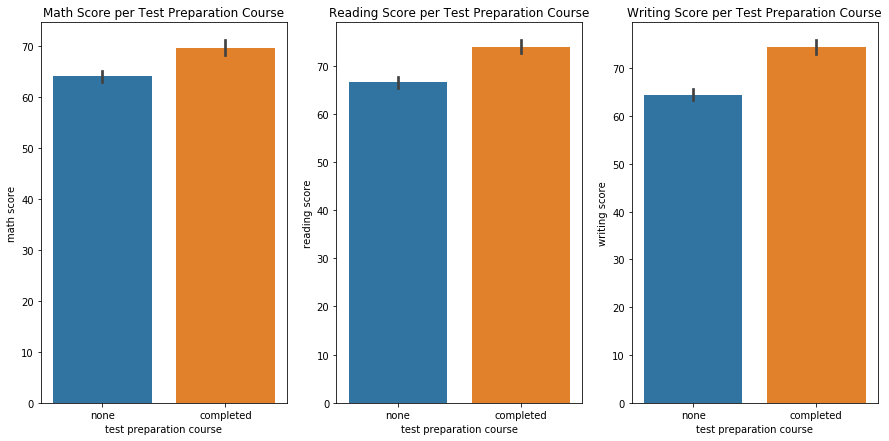

In [32]:
plt.figure(figsize=(15,7))

plt.subplot(1,3,1)
sns.barplot(student["test preparation course"], student["math score"])
plt.title("Math Score per Test Preparation Course")

plt.subplot(1,3,2)
sns.barplot(student["test preparation course"], student["reading score"])
plt.title("Reading Score per Test Preparation Course")

plt.subplot(1,3,3)
sns.barplot(student["test preparation course"], student["writing score"])
plt.title("Writing Score per Test Preparation Course")

plt.show()

In [33]:
test_prep = student["test preparation course"].unique()
for var in ["math score", "reading score", "writing score"]:
    print("------------------------------------------------")
    print("Comparisons for variable: {}".format(var))
    print("------------------------------------------------")
    print("t-test between groups {0} and {1}:".format(test_prep[0], test_prep[1]))
    print(stats.ttest_ind(
          student[student["test preparation course"]==test_prep[0]][var], 
          student[student["test preparation course"]==test_prep[1]][var]
        ))

------------------------------------------------
Comparisons for variable: math score
------------------------------------------------
t-test between groups none and completed:
Ttest_indResult(statistic=-5.704616417349102, pvalue=1.5359134607147415e-08)
------------------------------------------------
Comparisons for variable: reading score
------------------------------------------------
t-test between groups none and completed:
Ttest_indResult(statistic=-7.871663538941468, pvalue=9.081783336892205e-15)
------------------------------------------------
Comparisons for variable: writing score
------------------------------------------------
t-test between groups none and completed:
Ttest_indResult(statistic=-10.409173436808748, pvalue=3.68529173524572e-24)


The analysis showes the importance of taking a test preparation course before exams. The students who completed a test preparation course scored significantly higher than the students did not take the course. We need to know if the test prepartion course is the reason for different test scores between ethnicities or betwee parents level of education. Matbe the reason is financial and the students whose parents afford paying for the course received an advantage.

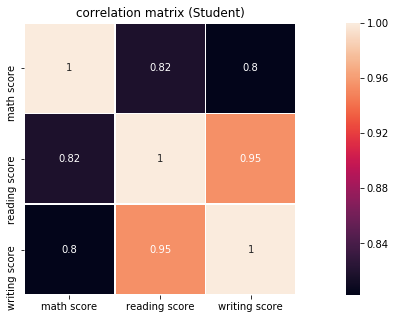

In [34]:
corrmat_student = student.corr()

plt.figure(figsize=(18,5))
sns.heatmap(corrmat_student, square=True, annot=True, linewidths=.5)
plt.title("correlation matrix (Student)")
plt.show()

The most correlated exam scores where reading and writing, and it makes sense since they are more related to each other than math. the correlation between math and these subjects is relatively high but it is lower than the perfect correlation between these two subjects